<a href="https://colab.research.google.com/github/Jucavilav/CienciaD-taller2/blob/main/Taller2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pylev

In [ ]:
import re
from random import randint
from seaborn import load_dataset
from datetime import datetime
from difflib import SequenceMatcher
import numpy as np
import pandas as pd
import pylev

In [ ]:
import numpy as np
import pandas as pd

from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import scipy.stats as stats

In [ ]:
pd.set_option("display.max_columns", None)

In [ ]:
pib_df = pd.read_csv("https://raw.githubusercontent.com/Jucavilav/CienciaD-taller2/main/datos/gapminder_final.csv")

In [ ]:
pib_df.shape

(178, 16)

In [ ]:
pib_df.sample(5)

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
95,Togo,285.224449,1.92,0.340031,28.1,3.223367e+07,48.400002,3.2,5.379820,57.062,NaN,-4.0,66.238522,6.369888,63.900002,42.00
48,Costa Rica,5188.900935,5.81,0.473654,30.9,1.484707e+08,40.099998,0.3,36.499115,79.311,NaN,10.0,798.340600,6.597168,58.599998,63.26
109,Cyprus,15313.859350,8.84,2.454913,67.2,1.835350e+08,51.299999,NaN,53.024745,79.591,NaN,10.0,2123.762863,2.206169,59.099998,69.90
102,Portugal,11744.834170,13.89,1.616886,55.5,1.865923e+09,50.599998,0.6,51.280478,79.499,1.180265,10.0,1259.392457,8.188375,57.599998,59.46
65,Russia,2923.144355,16.23,1.941446,38.8,2.340457e+10,53.799999,1.0,43.366498,68.823,1.032470,4.0,825.941111,27.874160,58.799999,72.84


### 1.0. Limpieza de los datos

Quitar registros duplicados y registros null

In [ ]:
pib_df['country'].nunique() #Total de paises

166

In [ ]:
# Registros duplicados por Pais
dupl = pib_df['country']
duplicados = dupl[dupl.duplicated()]
print("Registros duplicados:")
print(duplicados)
# Esto indica que tenemos un total 12 Paises duplicados, con lo cual se procedera con la depuracion de los paises repetidos.

Registros duplicados:
32        Switzerland
39               Oman
74     Macedonia, FYR
111             Sudan
120          Malaysia
124              Iran
143         Lithuania
148           Belarus
149           Vietnam
155           Ireland
156        Tajikistan
166        Luxembourg
Name: country, dtype: object


In [ ]:
# Elimina los valores duplicados basados en una columna Pais
pib_df = pib_df.drop_duplicates(subset=['country'])

In [ ]:
pib_df.shape #Tabla sin valores duplicados

(166, 16)

[20%] Entendimiento de los datos: Genere un breve reporte de entendimiento de
datos en donde destaque las dimensiones del dataset, los tipos de datos que
contiene y el top 5 de los indicadores que considera más importantes para el
ejercicio de regresión propuesto. Por cada indicador, incluya algunos elementos
básicos de su comportamiento o distribución (análisis univariado). También incluya
algunos elementos complementarios que permitan entender la relación entre
pares de indicadores, el país o la región a la que pertenecen (análisis bivariado).

In [ ]:
# Dimensiones del Dataset
pib_df.shape

(166, 16)

In [ ]:
# Tipo de Datos que contiene
pib_df.dtypes

country                  object
incomeperperson         float64
alcconsumption          float64
armedforcesrate         float64
breastcancerper100th    float64
co2emissions            float64
femaleemployrate        float64
hivrate                 float64
internetuserate         float64
lifeexpectancy          float64
oilperperson            float64
polityscore             float64
relectricperperson      float64
suicideper100th         float64
employrate              float64
urbanrate               float64
dtype: object

Top 5 de los indicadores que considera más importantes para el ejercicio de regresión propuesto:

- Tasa de empleo femenina
- Usuario de Internet
- Esperanza de vida
- Empleo
- Emisiones de CO2

In [ ]:
#Los PIB mas Altos
pib_df = pib_df.sort_values('incomeperperson', ascending=False)
pib_df.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
97,Luxembourg,52301.58718,12.84,0.731336,82.5,5.920127e+08,45.900002,0.30,90.079527,79.963,NaN,NaN,1566.106139,12.405918,53.500000,82.44
44,Norway,39972.35277,8.35,0.720528,74.8,1.962704e+09,60.900002,0.10,93.277508,81.097,2.191226,10.0,7432.130852,10.823000,65.000000,77.48
42,Japan,39309.47886,7.79,0.361858,32.7,4.609221e+10,46.200001,0.06,77.638535,83.394,1.593223,10.0,2257.572233,18.946930,57.299999,66.48
5,Switzerland,37662.75125,11.41,0.524220,81.7,2.406741e+09,57.000000,0.40,82.166660,82.338,1.487412,10.0,2361.033336,13.239810,64.300003,73.48
177,United States,37491.17952,9.70,0.972378,101.1,3.340000e+11,56.000000,0.60,74.247572,78.531,2.738544,10.0,4542.848695,9.927033,62.299999,81.70


In [ ]:
#Contar los null
pib_df.isnull().sum()

country                   0
incomeperperson           3
alcconsumption            0
armedforcesrate           4
breastcancerper100th      1
co2emissions              2
femaleemployrate          1
hivrate                  22
internetuserate           3
lifeexpectancy            0
oilperperson            105
polityscore              10
relectricperperson       36
suicideper100th           0
employrate                1
urbanrate                 0
dtype: int64

In [ ]:
df = pd.DataFrame(pib_df, columns=['incomeperperson'])
# Identificar registros que son de tipo texto
registros_texto = df[df['incomeperperson'].apply(lambda x: isinstance(x, str))]
# Contar cuántos registros son de tipo texto
cantidad_registros_texto = len(registros_texto)
print(f'Cantidad de registros de tipo texto: {cantidad_registros_texto}')

Cantidad de registros de tipo texto: 0


In [ ]:
# Seleccionar Columnas Deseadas
columnas_deseadas = ["country", "incomeperperson", "co2emissions", "femaleemployrate", "employrate", "internetuserate", "lifeexpectancy"]

# Ahora, selecciona las columnas deseadas
df_seleccionado = pib_df [columnas_deseadas]

In [ ]:
df_seleccionado.shape

(166, 7)

In [ ]:
df_seleccionado.head (5)

,country,incomeperperson,co2emissions,femaleemployrate,employrate,internetuserate,lifeexpectancy
97,Luxembourg,52301.58718,5.920127e+08,45.900002,53.500000,90.079527,79.963
44,Norway,39972.35277,1.962704e+09,60.900002,65.000000,93.277508,81.097
42,Japan,39309.47886,4.609221e+10,46.200001,57.299999,77.638535,83.394
5,Switzerland,37662.75125,2.406741e+09,57.000000,64.300003,82.166660,82.338
177,United States,37491.17952,3.340000e+11,56.000000,62.299999,74.247572,78.531


In [ ]:
# Eliminar los valores nulos de las columnas
columnas_a_verificar = ["country", "incomeperperson", "co2emissions", "femaleemployrate", "employrate", "internetuserate", "lifeexpectancy"]
df_seleccionado = df_seleccionado.dropna(subset=columnas_a_verificar)

In [ ]:
# Se eliminan los 8 valores nulos
df_seleccionado.shape

(158, 7)

In [ ]:
df_seleccionado.head (5)

,country,incomeperperson,co2emissions,femaleemployrate,employrate,internetuserate,lifeexpectancy
97,Luxembourg,52301.58718,5.920127e+08,45.900002,53.500000,90.079527,79.963
44,Norway,39972.35277,1.962704e+09,60.900002,65.000000,93.277508,81.097
42,Japan,39309.47886,4.609221e+10,46.200001,57.299999,77.638535,83.394
5,Switzerland,37662.75125,2.406741e+09,57.000000,64.300003,82.166660,82.338
177,United States,37491.17952,3.340000e+11,56.000000,62.299999,74.247572,78.531


In [ ]:
# Agregar un ID a cada Pais, en donde el 166 es el pais con el PIB mas alto y el 0 el mas bajo
num_filas = len(df_seleccionado)
df_seleccionado['ID Pais'] = range(num_filas - 1, -1, -1)

In [ ]:
df_seleccionado.head (5)

,country,incomeperperson,co2emissions,femaleemployrate,employrate,internetuserate,lifeexpectancy,ID Pais
97,Luxembourg,52301.58718,5.920127e+08,45.900002,53.500000,90.079527,79.963,157
44,Norway,39972.35277,1.962704e+09,60.900002,65.000000,93.277508,81.097,156
42,Japan,39309.47886,4.609221e+10,46.200001,57.299999,77.638535,83.394,155
5,Switzerland,37662.75125,2.406741e+09,57.000000,64.300003,82.166660,82.338,154
177,United States,37491.17952,3.340000e+11,56.000000,62.299999,74.247572,78.531,153


In [ ]:
features = ["co2emissions", "femaleemployrate", "employrate", "internetuserate", "lifeexpectancy"]

### 2.0. Búsqueda de relaciones con la variable objetivo

Si se logra visualizar o cuantificar altas correlaciones entre las variables de entrada y la variable objetivo, se podrán soportar las decisiones del experto con base en la evidencia.

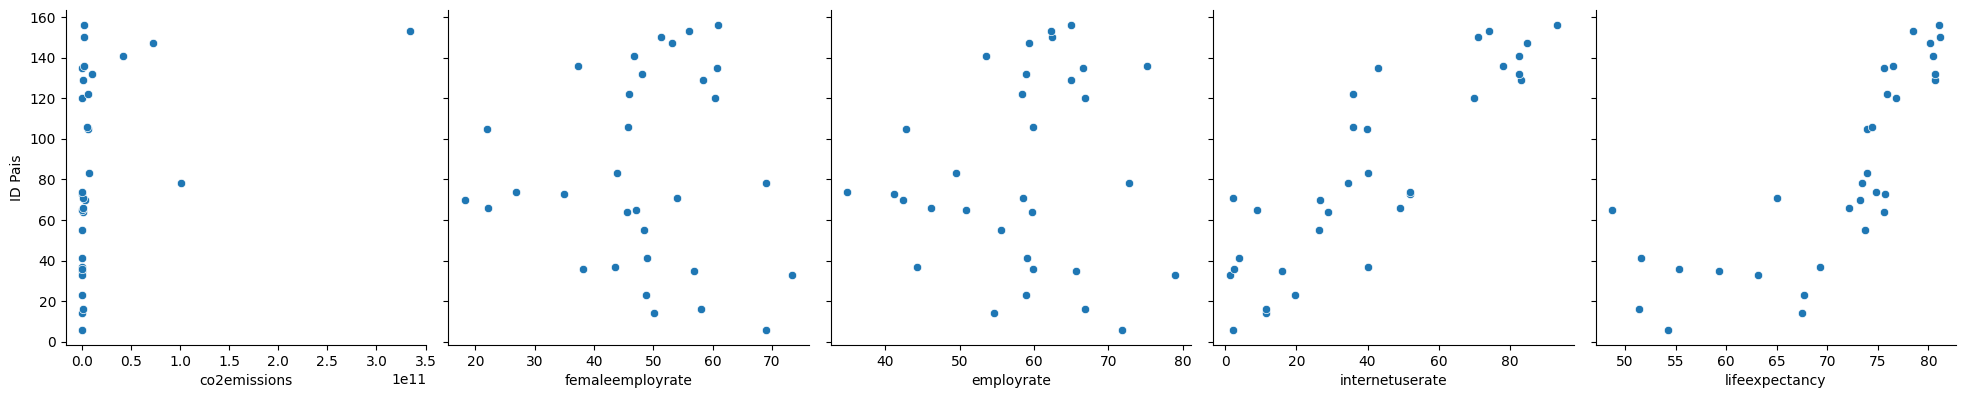

In [ ]:
sns.pairplot(df_seleccionado.sample(frac=0.2 ), height=4, y_vars="ID Pais", x_vars=features, kind="scatter")
#sns.pairplot(crabs_df.sample(frac=0.2), height=4, y_vars="Age", x_vars=features, kind="scatter")

#### 2.1. Búsqueda de relaciones entre las variables de entrada

**Importante:** La regresión lineal asume que sus variables de entrada no se encuentran altamente correlacionados.

<Axes: >

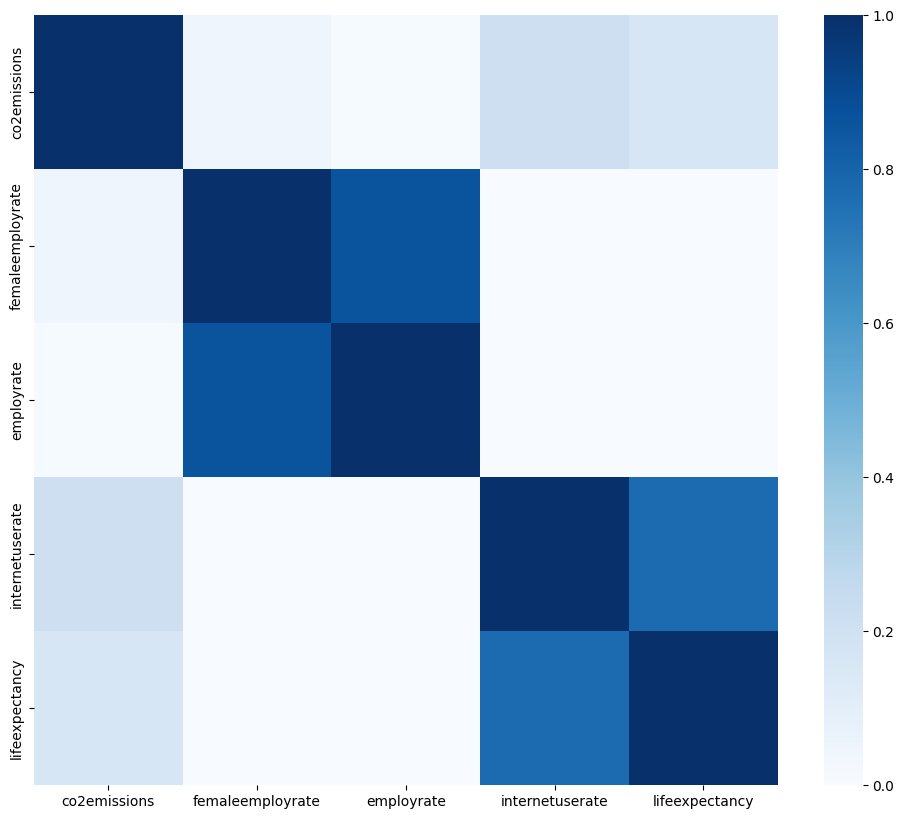

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_seleccionado[features].corr(), cmap="Blues", vmin=0, vmax=1)

#### 2.2. Univariado

[]

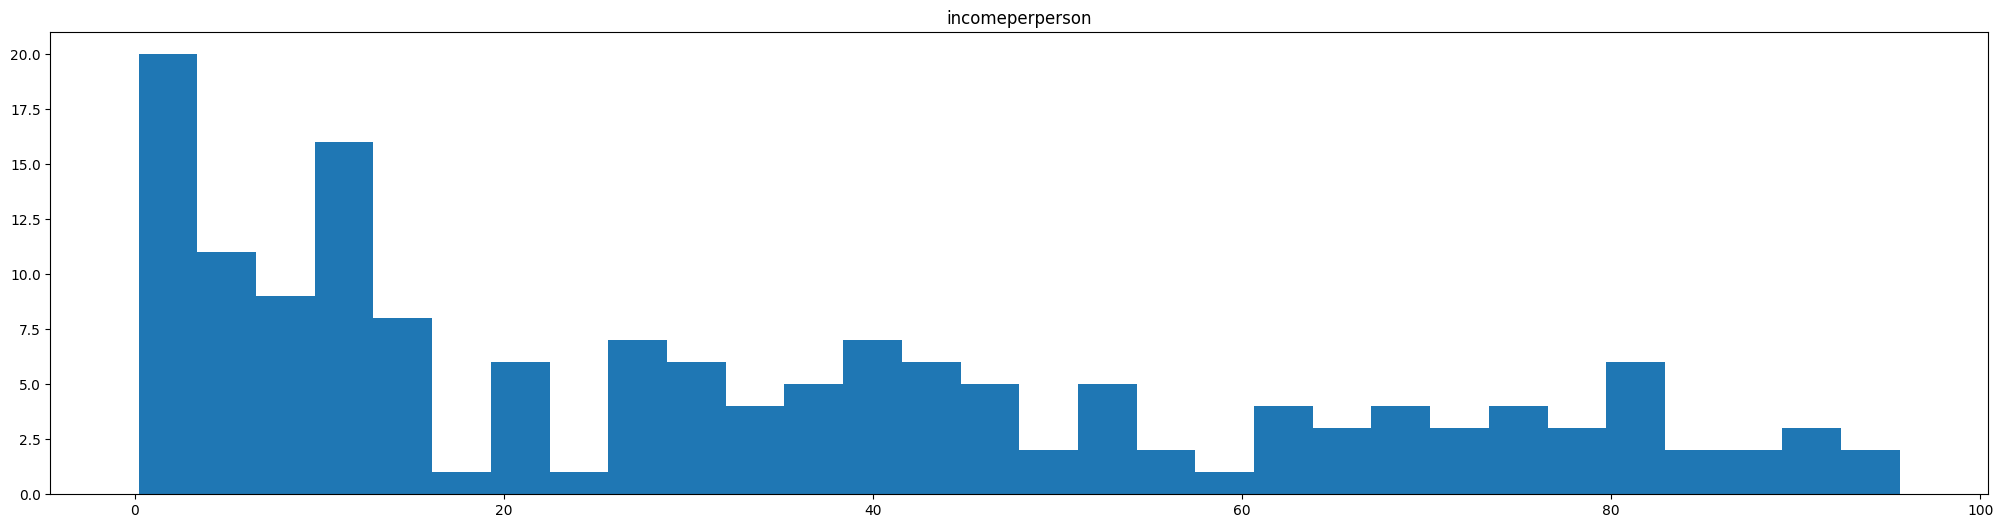

In [ ]:
# Histograma.
plt.figure(figsize=(25, 6))
plt.hist(df_seleccionado["internetuserate"], bins=30)
plt.title("incomeperperson")
plt.plot()

[]

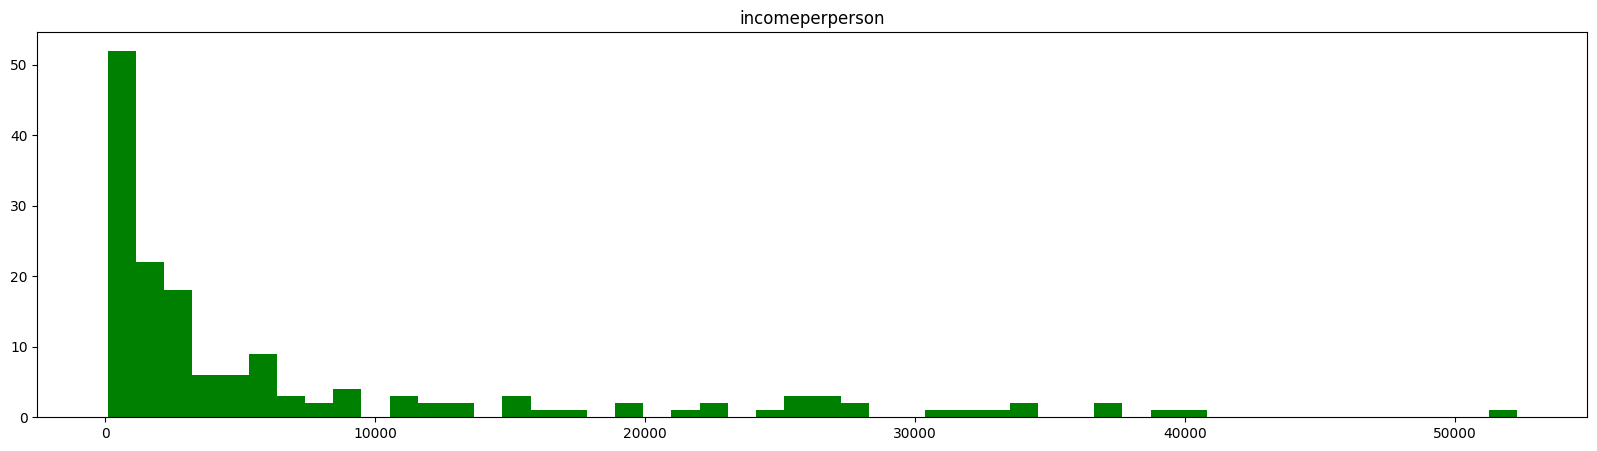

In [ ]:
# Cálculos para determinar en un umbral de valor atípico
q1 = df_seleccionado["internetuserate"].quantile(0.25)
q3 = df_seleccionado["internetuserate"].quantile(0.75)
iqr = q3 - q1

plt.figure(figsize=(20, 5))
plt.hist(df_seleccionado.loc[df_seleccionado["internetuserate"] <= (q3 + 1.5 * iqr)]["incomeperperson"], bins=50, color='green')
plt.title("incomeperperson")
plt.plot()

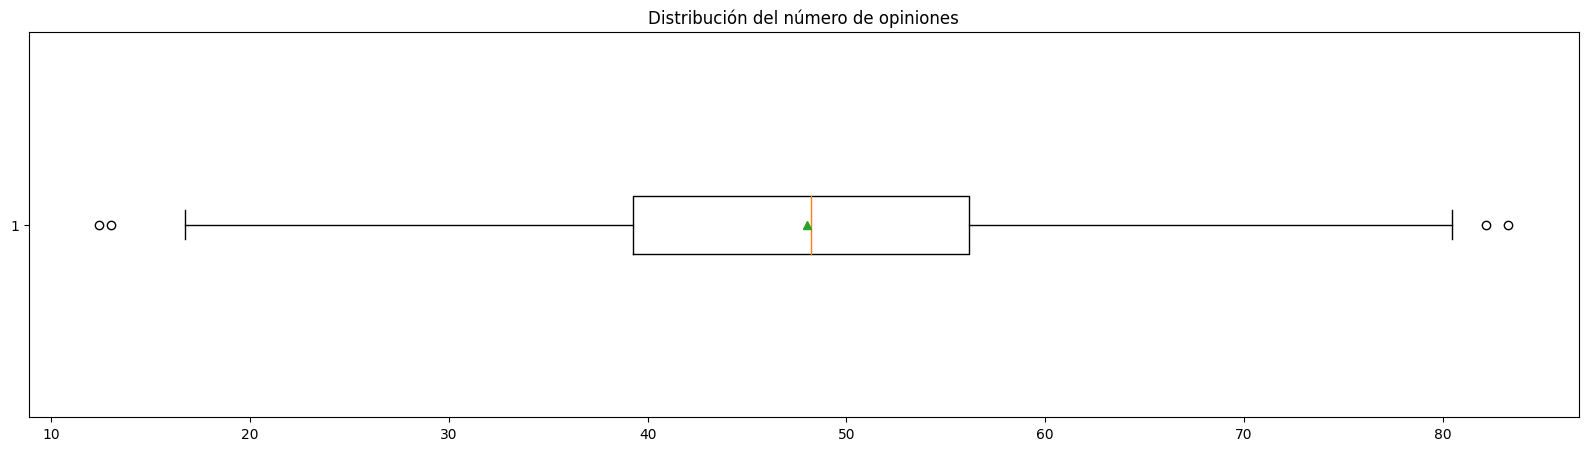

In [ ]:
# Diagrama para el número de opiniones
plt.figure(figsize=(20, 5))
plt.boxplot(df_seleccionado["femaleemployrate"], showmeans=True, vert=False)
plt.title("Distribución femaleemployrate")
plt.show()

## 3.0. Prepración de datos

Anteriormente al inicio del ejercicio ya habia realizado el proceso de limpieza de datos en todo caso se incluye nuevamente la revision para confirmar.

In [ ]:
total_rows = df_seleccionado.shape[0]
total_rows

158

In [ ]:
df_seleccionado.loc[df_seleccionado.duplicated(subset=features, keep=False)].head(3)

,country,incomeperperson,co2emissions,femaleemployrate,employrate,internetuserate,lifeexpectancy,ID Pais


In [ ]:
duplicated_rows = df_seleccionado.loc[df_seleccionado.duplicated(subset=features, keep=False)].shape[0]
duplicated_rows
print(f"Duplicates: {(duplicated_rows/total_rows)*100:.4f}%")

Duplicates: 0.0000%


## 4.0. Particionamiento del conjunto de datos en entrenamiento y prueba

Se dividira el DF dos partes:
- Entrenamiento 70%
- Prueba. 30%

In [55]:
X_train, X_test, y_train, y_test = train_test_split(df_seleccionado[features], df_seleccionado["incomeperperson"], test_size=0.3, random_state=1)

In [56]:
X_train.shape, y_train.shape

((110, 5), (110,))

In [57]:
X_test.shape, y_test.shape

((48, 5), (48,))

In [59]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

### 4.1. Interpretación de los coeficientes y del intercepto

In [60]:
pd.DataFrame({"columns": features, "coef": regression.coef_})

,columns,coef
0,co2emissions,4.761879e-08
1,femaleemployrate,-1.146752e+02
2,employrate,2.860024e+02
3,internetuserate,3.549198e+02
4,lifeexpectancy,-9.357512e+01


In [61]:
regression.intercept_

-9381.977455237082

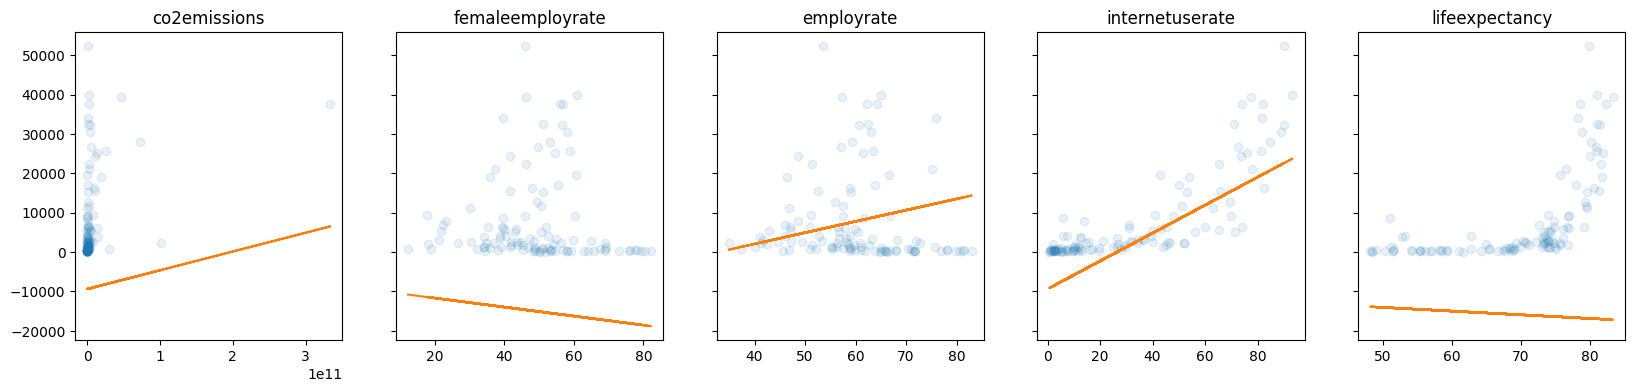

In [62]:
f, axs = plt.subplots(1, len(features), sharey=True, figsize=(20, 4))

for i in range(len(features)):
    col = features[i]
    x = X_train[col]
    m = regression.coef_[i]
    b = regression.intercept_

    axs[i].plot(x, y_train, "o", alpha=0.1)
    axs[i].plot(x, x * m + b)
    axs[i].set_title(col)

In [64]:
# Siendo el incremento de apenas 1/10 de unidad, se espera un cambio en la estimación de la variable objetivo de ~0.57%
df = pd.concat([df_seleccionado[features].iloc[0:1]] * 5).reset_index()
df["internetuserate"] = df["internetuserate"] + (df.index / 10)
df["prediction"] = regression.predict(df[features])
df["% change"] = df["prediction"].diff()
df

,index,co2emissions,femaleemployrate,employrate,internetuserate,lifeexpectancy,prediction,% change
0,97,592012666.7,45.900002,53.5,90.079527,79.963,25172.207995,NaN
1,97,592012666.7,45.900002,53.5,90.179527,79.963,25207.699974,35.49198
2,97,592012666.7,45.900002,53.5,90.279527,79.963,25243.191954,35.49198
3,97,592012666.7,45.900002,53.5,90.379527,79.963,25278.683933,35.49198
4,97,592012666.7,45.900002,53.5,90.479527,79.963,25314.175913,35.49198


### 4.2. Validación (evaluación) del modelo

**Mean Absolute Error (MAE)**

In [65]:
print("Train:", mean_absolute_error(y_train, regression.predict(X_train)))
print("Test:", mean_absolute_error(y_test, regression.predict(X_test)))

Train: 4296.635061714887
Test: 4384.544755042009


**Root Mean Squeared Error (RMSE)**

In [66]:
print("Train:", np.sqrt(mean_squared_error(y_train, regression.predict(X_train))))
print("Test:", np.sqrt(mean_squared_error(y_test, regression.predict(X_test))))

Train: 6033.251849324404
Test: 5502.743689189796


**Análisis del error**

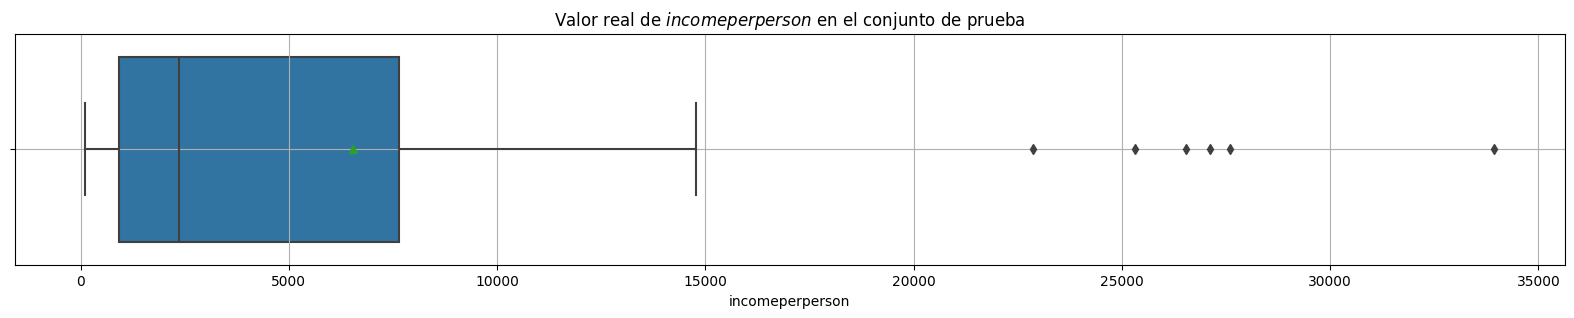

In [67]:
plt.figure(figsize=(20, 3))
sns.boxplot(x=y_test, showmeans=True, orient="h")
plt.title("Valor real de $\t{incomeperperson}$ en el conjunto de prueba")
plt.grid()
plt.show()

In [68]:
y_test.describe(percentiles=[0.25, 0.5, 0.75, 0.99])

count       48.000000
mean      6531.606966
std       8820.486747
min        115.305996
25%        930.212386
50%       2356.856126
75%       7647.366236
99%      30960.709577
max      33945.314420
Name: incomeperperson, dtype: float64

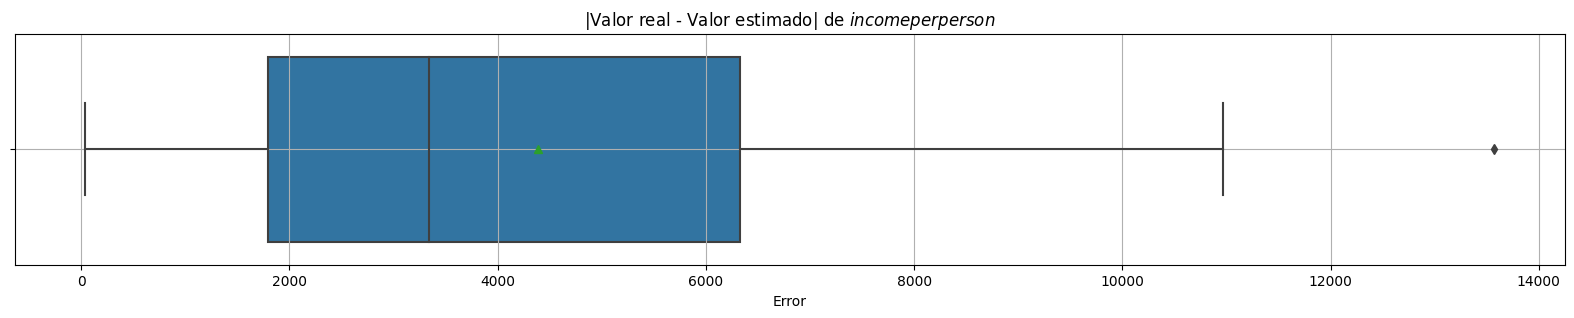

In [69]:
plt.figure(figsize=(20, 3))
sns.boxplot(x=abs(y_test - regression.predict(X_test)), showmeans=True, orient="h")
plt.title("|Valor real - Valor estimado| de $\t{incomeperperson}$")
plt.xlabel("Error")
plt.grid()
plt.show()

In [70]:
abs(y_test-regression.predict(X_test)).describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99])

count       48.000000
mean      4384.544755
std       3360.236375
min         39.221666
25%       1795.052749
50%       3343.847423
75%       6328.017673
95%      10318.090575
99%      12349.814012
max      13572.958241
Name: incomeperperson, dtype: float64